In [1]:
!pip install scikit-fuzzy --upgrade

  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=e0a8fcbfa7d43942d7374e7b41acd376171be3dd3fb49bd50f98a14d9bec60c6
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\32\2c\a1\a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import skfuzzy as skfuzzy

base = pd.read_csv('UCI_Credit_Card.csv')
base.shape

(30000, 25)

In [45]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [46]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [13]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [47]:
X = base.iloc[:,[1,25]].values

In [48]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [49]:
X.shape

(30000, 2)

In [21]:
X.T.shape

(2, 30000)

In [50]:
r = skfuzzy.cmeans(data = X.T, c = 3, m = 2, error=0.005, maxiter=1000, init=None)

In [51]:
r

(array([[ 0.97539137, -0.42055441],
        [ 0.74966522,  2.01628064],
        [-0.73888245, -0.30174578]]),
 array([[0.06225357, 0.12401597, 0.01586308, ..., 0.03497323, 0.02980669,
         0.01801385],
        [0.02592808, 0.02732582, 0.00499028, ..., 0.01492042, 0.01406345,
         0.00906648],
        [0.91181835, 0.84865821, 0.97914663, ..., 0.95010636, 0.95612986,
         0.97291967]]),
 array([[0.3693929 , 0.11957471, 0.53005168, ..., 0.78578623, 0.21668463,
         0.50986719],
        [0.07411053, 0.2415302 , 0.06232198, ..., 0.02561623, 0.48317314,
         0.25437491],
        [0.55649657, 0.63889509, 0.40762634, ..., 0.18859754, 0.30014223,
         0.2357579 ]]),
 array([[2.12931664, 1.36364247, 1.57275637, ..., 2.03772926, 1.70033509,
         1.90755481],
        [3.29941669, 2.9050441 , 2.80409507, ..., 3.11977942, 2.47540035,
         2.6888146 ],
        [0.55637576, 0.52128223, 0.20018494, ..., 0.39095632, 0.30021541,
         0.2595624 ]]),
 array([25645.036581

In [52]:
previsoes_porcentagem = r[1]

In [53]:
previsoes_porcentagem.shape

(3, 30000)

In [54]:
previsoes_porcentagem

array([[0.06225357, 0.12401597, 0.01586308, ..., 0.03497323, 0.02980669,
        0.01801385],
       [0.02592808, 0.02732582, 0.00499028, ..., 0.01492042, 0.01406345,
        0.00906648],
       [0.91181835, 0.84865821, 0.97914663, ..., 0.95010636, 0.95612986,
        0.97291967]])

In [33]:
previsoes_porcentagem[0][0]

0.02592790043421321

In [55]:
previsoes_porcentagem[1][0]

0.025928082291410012

In [56]:
previsoes_porcentagem[2][0]

0.9118183513911412

In [57]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [37]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [58]:
previsoes

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [39]:
previsoes[5000]

1

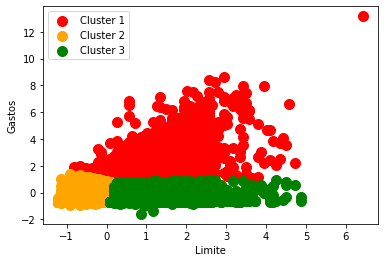

In [59]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();